# ODEformer quickstart
This notebook shows a few examples on how to use the ODEformer.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.family": "serif",
    'font.size':16,
    "lines.linewidth":2.0,
})

import symbolicregression
from symbolicregression.model import SymbolicTransformerRegressor

dstr = SymbolicTransformerRegressor(
    from_pretrained=True)

model_args = {'beam_size':50,
        'beam_temperature':0.1}
dstr.set_model_args(model_args)

Found pretrained model at odeformer.pt
Loaded pretrained model


In [42]:
times = np.linspace(0, 10, 50)
x = 2.3*np.cos(times+.5)
y = 1.2*np.sin(times+.1)
trajectory = np.stack([x, y], axis=1)

dstr.fit(times, trajectory)
dstr.print_predictions(n_candidates=1)


-0.3146 * x_0 + -2.0653 * x_1 | 0.5417 * x_0 + 0.3268 * x_1


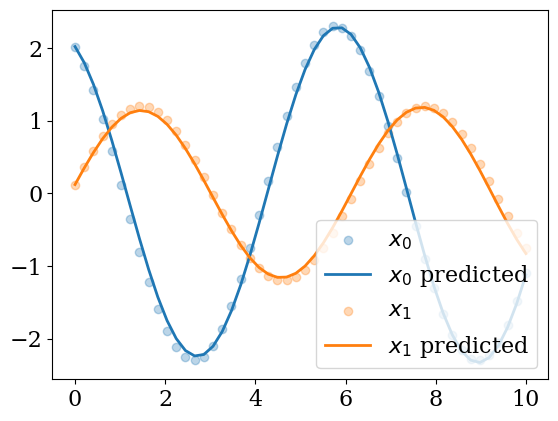

In [43]:
pred_traj = dstr.predict(times, trajectory[0])
dimension = len(trajectory[0])

for dim in range(dimension):
    plt.scatter(times, trajectory[:, dim], color = f'C{dim}', label=f'$x_{dim}$', marker='o', alpha=.3)
    plt.plot(times, pred_traj[:, dim],  color = f'C{dim}', label=f'$x_{dim}$ predicted')
plt.legend()

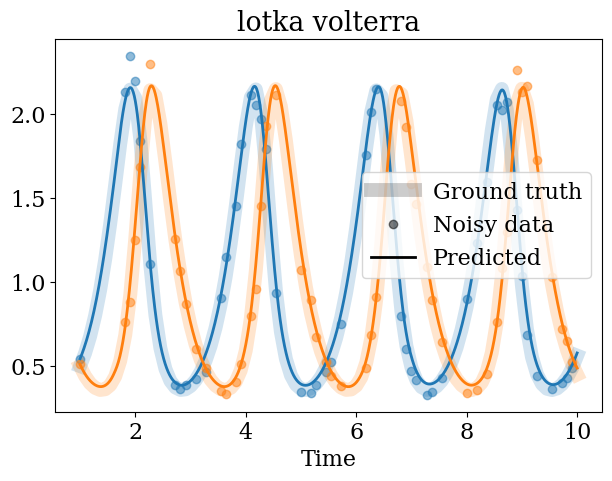

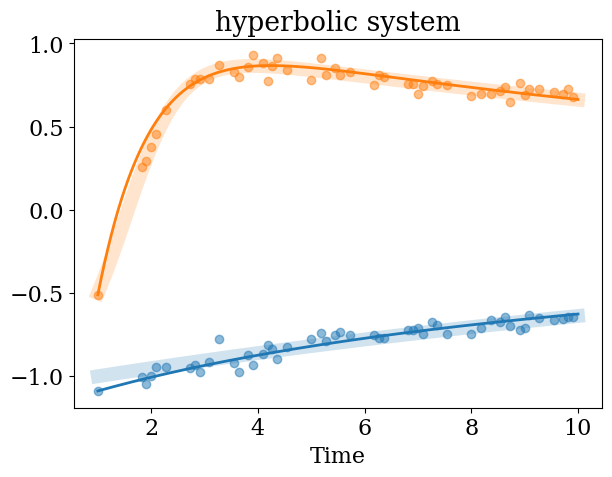

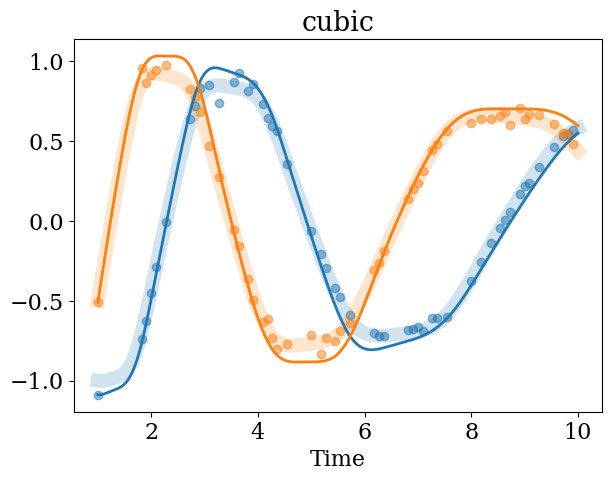

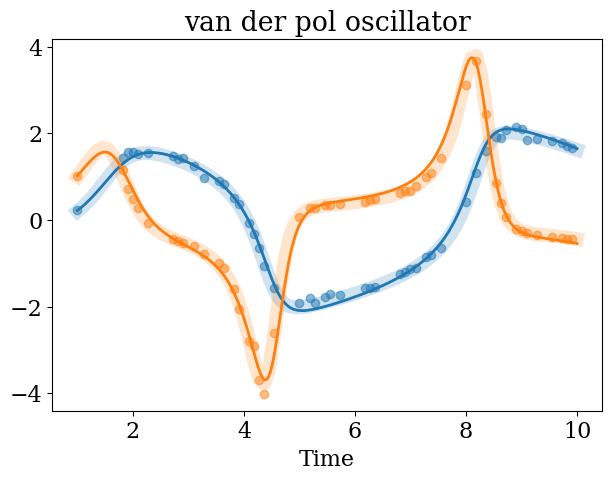

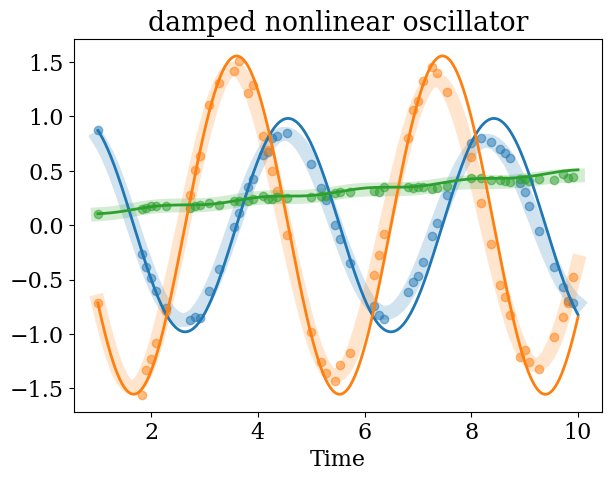

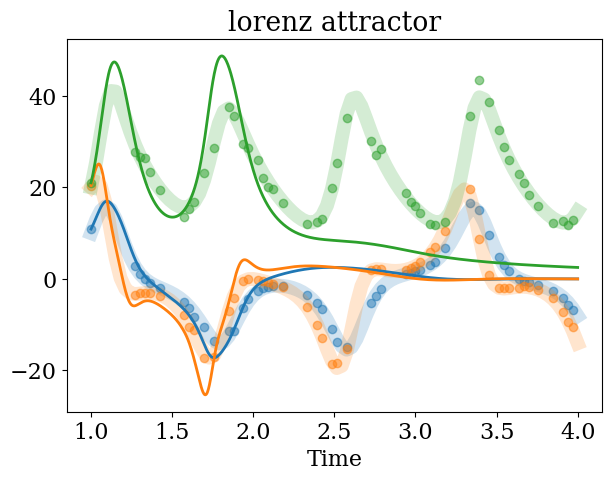

In [44]:
from ode_systems import *

systems = my_ode_systems
for system in systems:
    trajectory, pred_trajectory = plot_prediction(dstr, system=system, noise=.05, subsampling=0.5)